In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
data = pd.read_csv("Final_Project_Data/txt_files/taxi_2019_06.txt", sep = '|')

In [3]:
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,51792206,Ordinal,UVC,7.03,1.5,0.25,0.00,0.0,8.78,1,...,445,38.920125,-77.041859,2300 - 2399 BLOCK OF 18TH STREET NW,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,06/01/2019 04:00,06/01/2019 04:00
1,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.00,0.0,8.28,1,...,430,38.916643,-77.031951,1921 - 1999 BLOCK OF 14TH STREET NW,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,06/01/2019 04:00,06/01/2019 04:00
2,51792208,Ordinal,UVC,7.57,0.0,0.25,1.00,0.0,8.82,1,...,510,38.897207,-77.022423,700 - 799 BLOCK OF F STREET NW,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,06/01/2019 04:00,06/01/2019 04:00
3,51792209,Ordinal,UVC,19.72,10.0,0.25,0.00,0.0,29.97,1,...,1431,38.913724,-77.039614,1726 - 1799 BLOCK OF NEW HAMPSHIRE AVENUE NW,NaN,NaN,NaN,Y,06/01/2019 15:00,06/01/2019 15:00
4,51792210,Ordinal,Yellow Cab,7.03,0.0,0.25,3.03,0.0,7.81,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,N,06/01/2019 15:00,06/01/2019 15:00


In [4]:
data.isna().sum()

OBJECTID                            0
TRIPTYPE                            0
PROVIDERNAME                        0
FAREAMOUNT                      12795
GRATUITYAMOUNT                  12795
SURCHARGEAMOUNT                 12795
EXTRAFAREAMOUNT                 12795
TOLLAMOUNT                      12795
TOTALAMOUNT                         0
PAYMENTTYPE                         0
ORIGINCITY                          0
ORIGINSTATE                       338
ORIGINZIP                           0
DESTINATIONCITY                     0
DESTINATIONSTATE                  498
DESTINATIONZIP                      0
MILEAGE                             0
DURATION                            0
ORIGIN_BLOCK_LATITUDE          176803
ORIGIN_BLOCK_LONGITUDE         176803
ORIGIN_BLOCKNAME               176803
DESTINATION_BLOCK_LATITUDE     216321
DESTINATION_BLOCK_LONGITUDE    216321
DESTINATION_BLOCKNAME          216321
AIRPORT                             0
ORIGINDATETIME_TR                   0
DESTINATIOND

In [5]:
data = data.dropna()

In [6]:
data.isna().sum()

OBJECTID                       0
TRIPTYPE                       0
PROVIDERNAME                   0
FAREAMOUNT                     0
GRATUITYAMOUNT                 0
SURCHARGEAMOUNT                0
EXTRAFAREAMOUNT                0
TOLLAMOUNT                     0
TOTALAMOUNT                    0
PAYMENTTYPE                    0
ORIGINCITY                     0
ORIGINSTATE                    0
ORIGINZIP                      0
DESTINATIONCITY                0
DESTINATIONSTATE               0
DESTINATIONZIP                 0
MILEAGE                        0
DURATION                       0
ORIGIN_BLOCK_LATITUDE          0
ORIGIN_BLOCK_LONGITUDE         0
ORIGIN_BLOCKNAME               0
DESTINATION_BLOCK_LATITUDE     0
DESTINATION_BLOCK_LONGITUDE    0
DESTINATION_BLOCKNAME          0
AIRPORT                        0
ORIGINDATETIME_TR              0
DESTINATIONDATETIME_TR         0
dtype: int64

In [7]:
len(data)

515063

In [8]:
data['origin_coor'] = list(data[['ORIGIN_BLOCK_LONGITUDE', 'ORIGIN_BLOCK_LATITUDE']].values)
data['dest_coor'] = list(data[['DESTINATION_BLOCK_LONGITUDE', 'DESTINATION_BLOCK_LATITUDE']].values)
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,origin_coor,dest_coor
0,51792206,Ordinal,UVC,7.03,1.5,0.25,0.0,0.0,8.78,1,...,-77.041859,2300 - 2399 BLOCK OF 18TH STREET NW,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,"[-77.041859, 38.920125]","[-77.02463399999999, 38.916996000000005]"
1,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.0,0.0,8.28,1,...,-77.031951,1921 - 1999 BLOCK OF 14TH STREET NW,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,"[-77.031951, 38.916643]","[-77.04168299999999, 38.906064]"
2,51792208,Ordinal,UVC,7.57,0.0,0.25,1.0,0.0,8.82,1,...,-77.022423,700 - 799 BLOCK OF F STREET NW,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,"[-77.022423, 38.897207]","[-77.033254, 38.909652]"
5,51792211,Ordinal,UVC,6.76,0.0,0.25,1.0,0.0,8.01,2,...,-77.007369,1 - 99 BLOCK OF POTOMAC AVENUE SE,38.876461,-77.020817,600 - 649 BLOCK OF WATER STREET SW,N,06/01/2019 15:00,06/01/2019 15:00,"[-77.007369, 38.871368]","[-77.02081700000001, 38.876461]"
8,51792214,Ordinal,Grand Cab,6.22,0.0,0.25,1.0,0.0,7.47,2,...,-77.029111,1200 - 1399 BLOCK OF MARYLAND AVENUE SW,38.890569,-77.019738,400 - 699 BLOCK OF MADISON DRIVE NW,N,06/01/2019 15:00,06/01/2019 15:00,"[-77.029111, 38.884205]","[-77.019738, 38.890569]"


In [9]:
data['origin_coor'] = data['origin_coor'].apply(Point)
data['dest_coor'] = data['dest_coor'].apply(Point)
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,origin_coor,dest_coor
0,51792206,Ordinal,UVC,7.03,1.5,0.25,0.0,0.0,8.78,1,...,-77.041859,2300 - 2399 BLOCK OF 18TH STREET NW,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.041859 38.920125),POINT (-77.02463399999999 38.916996)
1,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.0,0.0,8.28,1,...,-77.031951,1921 - 1999 BLOCK OF 14TH STREET NW,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.03195100000001 38.916643),POINT (-77.04168299999999 38.906064)
2,51792208,Ordinal,UVC,7.57,0.0,0.25,1.0,0.0,8.82,1,...,-77.022423,700 - 799 BLOCK OF F STREET NW,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.022423 38.897207),POINT (-77.033254 38.909652)
5,51792211,Ordinal,UVC,6.76,0.0,0.25,1.0,0.0,8.01,2,...,-77.007369,1 - 99 BLOCK OF POTOMAC AVENUE SE,38.876461,-77.020817,600 - 649 BLOCK OF WATER STREET SW,N,06/01/2019 15:00,06/01/2019 15:00,POINT (-77.007369 38.871368),POINT (-77.02081700000001 38.876461)
8,51792214,Ordinal,Grand Cab,6.22,0.0,0.25,1.0,0.0,7.47,2,...,-77.029111,1200 - 1399 BLOCK OF MARYLAND AVENUE SW,38.890569,-77.019738,400 - 699 BLOCK OF MADISON DRIVE NW,N,06/01/2019 15:00,06/01/2019 15:00,POINT (-77.029111 38.884205),POINT (-77.019738 38.890569)


In [11]:
geo_1 = gpd.GeoDataFrame(data, geometry='origin_coor')
geo_2 = gpd.GeoDataFrame(data, geometry='dest_coor')

print(type(geo_1['origin_coor']))
print(type(geo_2['dest_coor']))

<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>


In [17]:
filepath = "Final_Project_Data/census-tracts-2010.geojson.txt"
map_df = gpd.read_file(filepath)
map_df.head()

,OBJECTID,TRACT,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,...,H0010003,ACRES,SQ_MILES,Shape_Length,Shape_Area,FAGI_TOTAL_2010,FAGI_MEDIAN_2010,FAGI_TOTAL_2013,FAGI_MEDIAN_2013,geometry
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,107,606.401784,0.947503,6507.906513,2.454021e+06,441410751.0,114136.5,445020421.0,105423.5,POLYGON ((-77.07862731061486 38.94604079377298...
1,2,001002,11001001002,3442,3329,2788,185,7,311,0,...,253,219.834053,0.343491,3952.278513,8.896369e+05,119559942.0,74658.0,134639759.0,76705.0,POLYGON ((-77.07241230806461 38.93361179147915...
2,3,004001,11001004001,3745,3623,3237,139,5,162,8,...,184,68.162548,0.106504,2361.335362,2.758440e+05,203836328.0,72807.0,230295472.0,77629.0,POLYGON ((-77.04659929925825 38.92324478991338...
3,4,004002,11001004002,2797,2720,2232,226,4,181,1,...,154,48.451481,0.075705,2132.734912,1.960762e+05,132421749.0,60460.5,170535365.0,65155.0,"POLYGON ((-77.04609029867974 38.9144417882433,..."
4,5,004100,11001004100,2708,2646,2261,115,9,181,3,...,208,201.868555,0.315420,3872.498178,8.169331e+05,403203164.0,87019.0,217573711.0,81283.5,POLYGON ((-77.04995330062248 38.92084978921181...


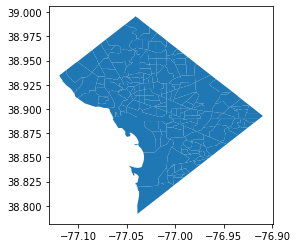

In [18]:
map_df.plot()

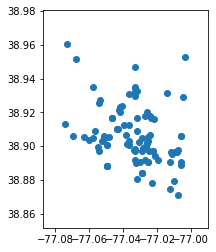

In [19]:
geo_1.head(100).plot()

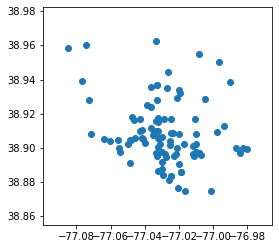

In [20]:
geo_2.head(100).plot()

Text(0.5, 1, 'Taxi Rides')

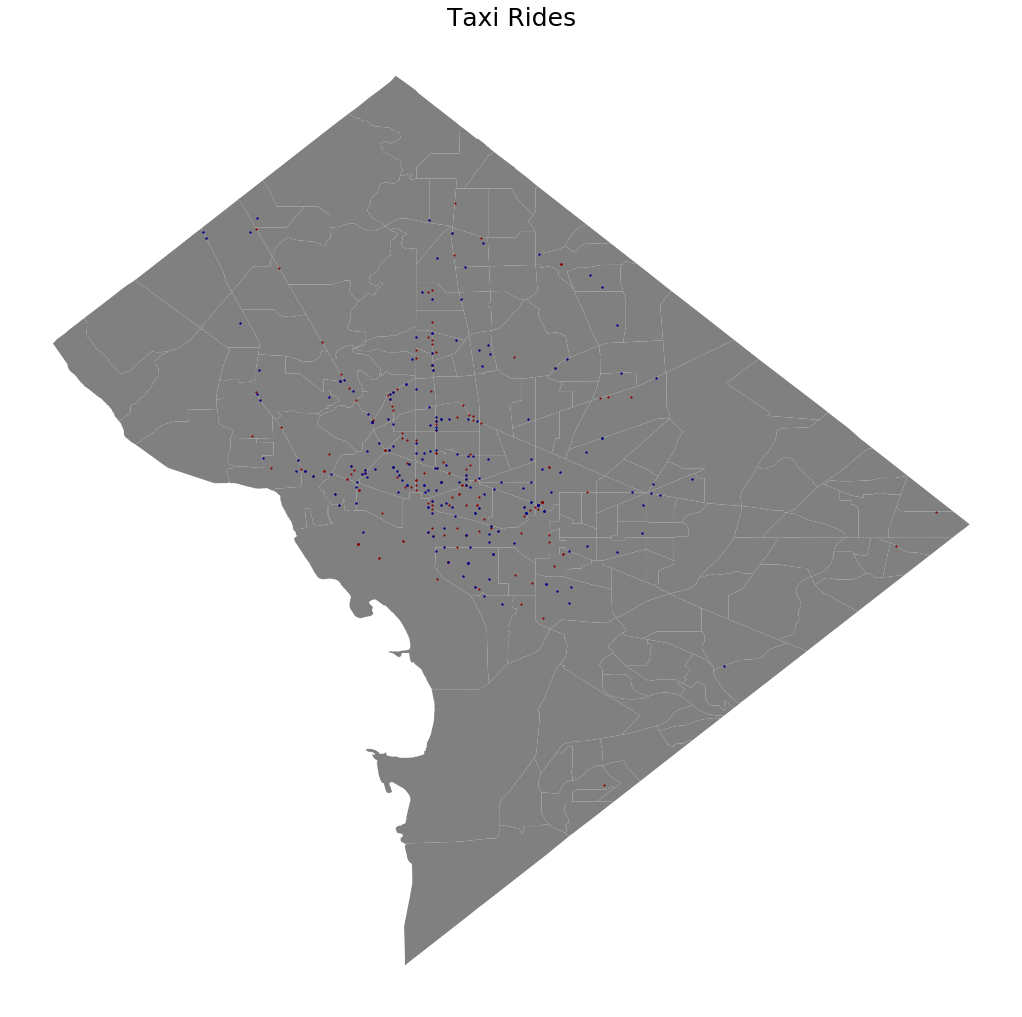

In [23]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(20,18))

#this is the map
# we want to set the ax values the same for both maps to see them overlayed
basemap = map_df.plot(ax=ax, color = 'grey')

#plot coordinates on top of map graph
geo_1.head(200).plot(ax=basemap, color='darkred', marker = '.', markersize=5)
geo_2.head(200).plot(ax=basemap, color='darkblue', marker = '.', markersize=7)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("June Taxi Rides", fontsize=25, fontweight=3)

### Time Series 

In [24]:
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,origin_coor,dest_coor
0,51792206,Ordinal,UVC,7.03,1.5,0.25,0.0,0.0,8.78,1,...,-77.041859,2300 - 2399 BLOCK OF 18TH STREET NW,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.041859 38.920125),POINT (-77.02463399999999 38.916996)
1,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.0,0.0,8.28,1,...,-77.031951,1921 - 1999 BLOCK OF 14TH STREET NW,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.03195100000001 38.916643),POINT (-77.04168299999999 38.906064)
2,51792208,Ordinal,UVC,7.57,0.0,0.25,1.0,0.0,8.82,1,...,-77.022423,700 - 799 BLOCK OF F STREET NW,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.022423 38.897207),POINT (-77.033254 38.909652)
5,51792211,Ordinal,UVC,6.76,0.0,0.25,1.0,0.0,8.01,2,...,-77.007369,1 - 99 BLOCK OF POTOMAC AVENUE SE,38.876461,-77.020817,600 - 649 BLOCK OF WATER STREET SW,N,06/01/2019 15:00,06/01/2019 15:00,POINT (-77.007369 38.871368),POINT (-77.02081700000001 38.876461)
8,51792214,Ordinal,Grand Cab,6.22,0.0,0.25,1.0,0.0,7.47,2,...,-77.029111,1200 - 1399 BLOCK OF MARYLAND AVENUE SW,38.890569,-77.019738,400 - 699 BLOCK OF MADISON DRIVE NW,N,06/01/2019 15:00,06/01/2019 15:00,POINT (-77.029111 38.884205),POINT (-77.019738 38.890569)


In [26]:
data['origin_time'] = pd.to_datetime(data['ORIGINDATETIME_TR'])
data['dest_time'] = pd.to_datetime(data['DESTINATIONDATETIME_TR'])
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,origin_coor,dest_coor,origin_time,dest_time
0,51792206,Ordinal,UVC,7.03,1.5,0.25,0.0,0.0,8.78,1,...,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.041859 38.920125),POINT (-77.02463399999999 38.916996),2019-06-01 04:00:00,2019-06-01 04:00:00
1,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.0,0.0,8.28,1,...,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.03195100000001 38.916643),POINT (-77.04168299999999 38.906064),2019-06-01 04:00:00,2019-06-01 04:00:00
2,51792208,Ordinal,UVC,7.57,0.0,0.25,1.0,0.0,8.82,1,...,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,06/01/2019 04:00,06/01/2019 04:00,POINT (-77.022423 38.897207),POINT (-77.033254 38.909652),2019-06-01 04:00:00,2019-06-01 04:00:00
5,51792211,Ordinal,UVC,6.76,0.0,0.25,1.0,0.0,8.01,2,...,38.876461,-77.020817,600 - 649 BLOCK OF WATER STREET SW,N,06/01/2019 15:00,06/01/2019 15:00,POINT (-77.007369 38.871368),POINT (-77.02081700000001 38.876461),2019-06-01 15:00:00,2019-06-01 15:00:00
8,51792214,Ordinal,Grand Cab,6.22,0.0,0.25,1.0,0.0,7.47,2,...,38.890569,-77.019738,400 - 699 BLOCK OF MADISON DRIVE NW,N,06/01/2019 15:00,06/01/2019 15:00,POINT (-77.029111 38.884205),POINT (-77.019738 38.890569),2019-06-01 15:00:00,2019-06-01 15:00:00


In [29]:
data = data.drop(['ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR'], axis = 1)
data.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,origin_coor,dest_coor,origin_time,dest_time
0,51792206,Ordinal,UVC,7.03,1.5,0.25,0.0,0.0,8.78,1,...,-77.041859,2300 - 2399 BLOCK OF 18TH STREET NW,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,POINT (-77.041859 38.920125),POINT (-77.02463399999999 38.916996),2019-06-01 04:00:00,2019-06-01 04:00:00
1,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.0,0.0,8.28,1,...,-77.031951,1921 - 1999 BLOCK OF 14TH STREET NW,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,POINT (-77.03195100000001 38.916643),POINT (-77.04168299999999 38.906064),2019-06-01 04:00:00,2019-06-01 04:00:00
2,51792208,Ordinal,UVC,7.57,0.0,0.25,1.0,0.0,8.82,1,...,-77.022423,700 - 799 BLOCK OF F STREET NW,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,POINT (-77.022423 38.897207),POINT (-77.033254 38.909652),2019-06-01 04:00:00,2019-06-01 04:00:00
5,51792211,Ordinal,UVC,6.76,0.0,0.25,1.0,0.0,8.01,2,...,-77.007369,1 - 99 BLOCK OF POTOMAC AVENUE SE,38.876461,-77.020817,600 - 649 BLOCK OF WATER STREET SW,N,POINT (-77.007369 38.871368),POINT (-77.02081700000001 38.876461),2019-06-01 15:00:00,2019-06-01 15:00:00
8,51792214,Ordinal,Grand Cab,6.22,0.0,0.25,1.0,0.0,7.47,2,...,-77.029111,1200 - 1399 BLOCK OF MARYLAND AVENUE SW,38.890569,-77.019738,400 - 699 BLOCK OF MADISON DRIVE NW,N,POINT (-77.029111 38.884205),POINT (-77.019738 38.890569),2019-06-01 15:00:00,2019-06-01 15:00:00


In [31]:
time_dict = {}

for x in data['origin_time']: 
    if x in time_dict: 
        time_dict[x] += 1 
    else: 
        time_dict[x] = 1 

In [36]:
time_df = pd.DataFrame.from_dict(time_dict, orient = 'index')

In [41]:
time_df['ride_count'] = time_df[0]
time_df = time_df.drop(0, axis = 1)

In [42]:
time_df.head()

,ride_count
2019-06-01 04:00:00,447
2019-06-01 15:00:00,526
2019-06-01 20:00:00,807
2019-06-02 00:00:00,477
2019-06-01 03:00:00,447


Text(0, 0.5, 'Hourly TaxiRide Count')

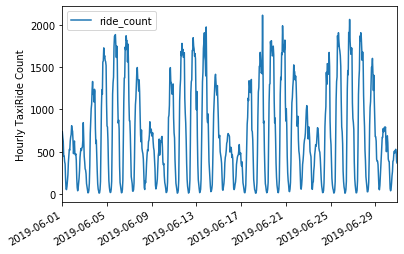

In [44]:
#bar plot of data
time_df.plot()
plt.ylabel('Hourly TaxiRide Count')

Text(0, 0.5, 'Weekly TaxiRide Count')

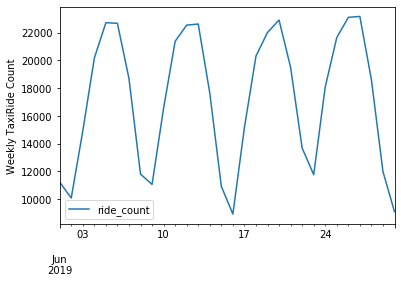

In [47]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = time_df.resample('D').sum()
weekly.plot() #line styles for each feature
plt.ylabel('Weekly TaxiRide Count')

In [65]:
june_16 = time_df.loc['2019-06-16']
june_16

,ride_count
2019-06-16 16:00:00,436
2019-06-16 22:00:00,464
2019-06-16 23:00:00,484
2019-06-16 20:00:00,584
2019-06-16 07:00:00,217
2019-06-16 08:00:00,70
2019-06-16 06:00:00,420
2019-06-16 17:00:00,455
2019-06-16 12:00:00,142
2019-06-16 10:00:00,71


In [51]:
june_12 = time_df.loc['2019-06-12']

In [53]:
june_13 = time_df.loc['2019-06-13']

In [55]:
june_23 = time_df.loc['2019-06-23']

In [58]:
june_22 = time_df.loc['2019-06-22']

In [60]:
june_24 = time_df.loc['2019-06-24']

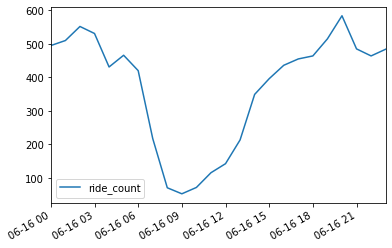

In [50]:
#Sunday
june_16.plot()

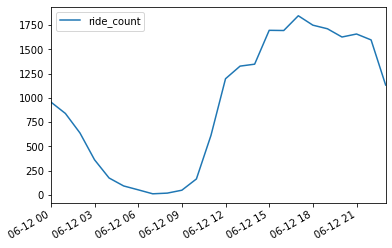

In [52]:
#Wednesday
june_12.plot()

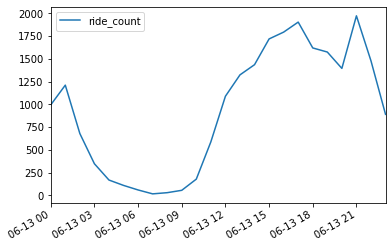

In [54]:
#Thursday
june_13.plot()

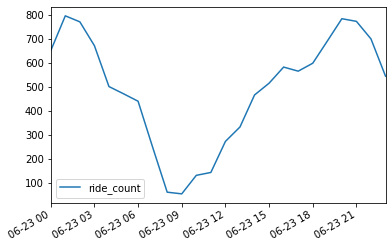

In [57]:
#Sunday
june_23.plot()

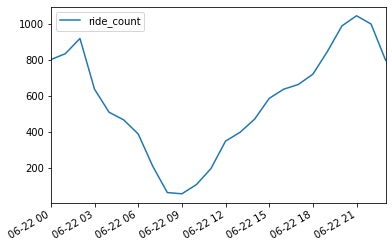

In [59]:
#Saturday
june_22.plot()

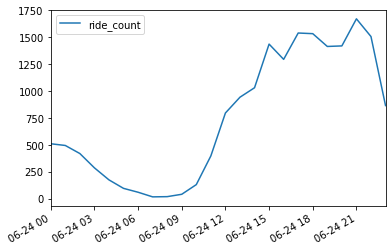

In [61]:
#Monday
june_24.plot()

### Ride Destinations

In [69]:
date_df = data.set_index('origin_time')

In [70]:
date_df.head()

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,origin_coor,dest_coor,dest_time
origin_time,,,,,,,,,,,,,,,,,,,,,
2019-06-01 04:00:00,51792206,Ordinal,UVC,7.03,1.5,0.25,0.0,0.0,8.78,1,...,38.920125,-77.041859,2300 - 2399 BLOCK OF 18TH STREET NW,38.916996,-77.024634,900 - 931 BLOCK OF U STREET NW,N,POINT (-77.041859 38.920125),POINT (-77.02463399999999 38.916996),2019-06-01 04:00:00
2019-06-01 04:00:00,51792207,Ordinal,DC VIP Cab,7.03,1.0,0.25,0.0,0.0,8.28,1,...,38.916643,-77.031951,1921 - 1999 BLOCK OF 14TH STREET NW,38.906064,-77.041683,1200 - 1217 BLOCK OF 18TH STREET NW,N,POINT (-77.03195100000001 38.916643),POINT (-77.04168299999999 38.906064),2019-06-01 04:00:00
2019-06-01 04:00:00,51792208,Ordinal,UVC,7.57,0.0,0.25,1.0,0.0,8.82,1,...,38.897207,-77.022423,700 - 799 BLOCK OF F STREET NW,38.909652,-77.033254,1400 - 1499 BLOCK OF P STREET NW,N,POINT (-77.022423 38.897207),POINT (-77.033254 38.909652),2019-06-01 04:00:00
2019-06-01 15:00:00,51792211,Ordinal,UVC,6.76,0.0,0.25,1.0,0.0,8.01,2,...,38.871368,-77.007369,1 - 99 BLOCK OF POTOMAC AVENUE SE,38.876461,-77.020817,600 - 649 BLOCK OF WATER STREET SW,N,POINT (-77.007369 38.871368),POINT (-77.02081700000001 38.876461),2019-06-01 15:00:00
2019-06-01 15:00:00,51792214,Ordinal,Grand Cab,6.22,0.0,0.25,1.0,0.0,7.47,2,...,38.884205,-77.029111,1200 - 1399 BLOCK OF MARYLAND AVENUE SW,38.890569,-77.019738,400 - 699 BLOCK OF MADISON DRIVE NW,N,POINT (-77.029111 38.884205),POINT (-77.019738 38.890569),2019-06-01 15:00:00


In [71]:
date_16 = date_df['2019-06-16']

In [72]:
date_16

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,origin_coor,dest_coor,dest_time
origin_time,,,,,,,,,,,,,,,,,,,,,
2019-06-16 16:00:00,52135500,Ordinal,Grand Cab,8.11,0.00,0.25,0.00,0.0,8.36,2,...,38.899817,-77.026514,1000 - 1099 BLOCK OF H STREET NW,38.897204,-77.008388,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,N,POINT (-77.02651400000001 38.899817),POINT (-77.008388 38.897204),2019-06-16 16:00:00
2019-06-16 16:00:00,52135501,Ordinal,Capitol Cab,11.35,0.00,0.25,1.00,0.0,12.60,2,...,38.906252,-77.051405,1200 - 1299 BLOCK OF 24TH STREET NW,38.918384,-77.098312,4880 - 4997 BLOCK OF MACARTHUR BOULEVARD NW,N,POINT (-77.051405 38.906252),POINT (-77.09831199999999 38.918384),2019-06-16 16:00:00
2019-06-16 16:00:00,52135502,Ordinal,Capitol Cab,10.54,0.00,0.25,0.00,0.0,10.79,2,...,38.905989,-77.031858,6 - 9 BLOCK OF THOMAS CIRCLE NW,38.924200,-77.051903,2600 - 2649 BLOCK OF CONNECTICUT AVENUE NW,N,POINT (-77.031858 38.905989),POINT (-77.051903 38.9242),2019-06-16 16:00:00
2019-06-16 16:00:00,52135504,Ordinal,UVC,8.11,0.00,0.25,1.00,0.0,9.36,2,...,38.888768,-77.019734,400 - 699 BLOCK OF JEFFERSON DRIVE SW,38.900339,-77.019910,800 - 899 BLOCK OF 6TH STREET NW,N,POINT (-77.019734 38.888768),POINT (-77.01991 38.900339),2019-06-16 16:00:00
2019-06-16 16:00:00,52135506,Ordinal,Grand Cab,7.84,2.02,0.25,0.00,0.0,10.11,1,...,38.897896,-77.007533,600 - 699 BLOCK OF 1ST STREET NE,38.901805,-77.024996,900 - 999 BLOCK OF NEW YORK AVENUE NW,N,POINT (-77.007533 38.897896),POINT (-77.024996 38.901805),2019-06-16 16:00:00
2019-06-16 16:00:00,52135507,Ordinal,UVC,4.87,5.90,0.25,0.00,0.0,11.02,1,...,38.899130,-77.021917,700 - 799 BLOCK OF 7TH STREET NW,38.907238,-77.024975,900 - 999 BLOCK OF N STREET NW,N,POINT (-77.021917 38.89913),POINT (-77.024975 38.907238),2019-06-16 16:00:00
2019-06-16 16:00:00,52135509,Ordinal,Capitol Cab,8.38,3.00,0.25,1.00,0.0,12.63,1,...,38.913322,-77.046626,1700 - 1799 BLOCK OF 21ST STREET NW,38.906605,-77.031392,1200 - 1299 BLOCK OF VERMONT AVENUE NW,N,POINT (-77.046626 38.91332199999999),POINT (-77.03139200000001 38.906605),2019-06-16 16:00:00
2019-06-16 22:00:00,52135513,Ordinal,DC VIP Cab,11.08,0.00,0.25,1.00,0.0,12.33,2,...,38.898949,-77.046657,700 - 799 BLOCK OF 21ST STREET NW,38.900342,-77.021915,800 - 899 BLOCK OF 7TH STREET NW,N,POINT (-77.046657 38.898949),POINT (-77.02191500000001 38.90034199999999),2019-06-16 23:00:00
2019-06-16 22:00:00,52135514,Ordinal,UVC,14.86,0.00,0.25,0.00,0.0,15.11,2,...,38.900774,-77.039447,800 - 899 BLOCK OF 17TH STREET NW,38.949141,-77.054782,4500 - 4599 BLOCK OF 28TH STREET NW,N,POINT (-77.039447 38.900774),POINT (-77.05478199999999 38.949141),2019-06-16 23:00:00


In [74]:
geo_o16 = gpd.GeoDataFrame(date_16, geometry='origin_coor')
geo_d16 = gpd.GeoDataFrame(date_16, geometry='dest_coor')

print(type(geo_o16['origin_coor']))
print(type(geo_d16['dest_coor']))

<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>


Text(0.5, 1, 'June 16 11 PM Taxi Rides')

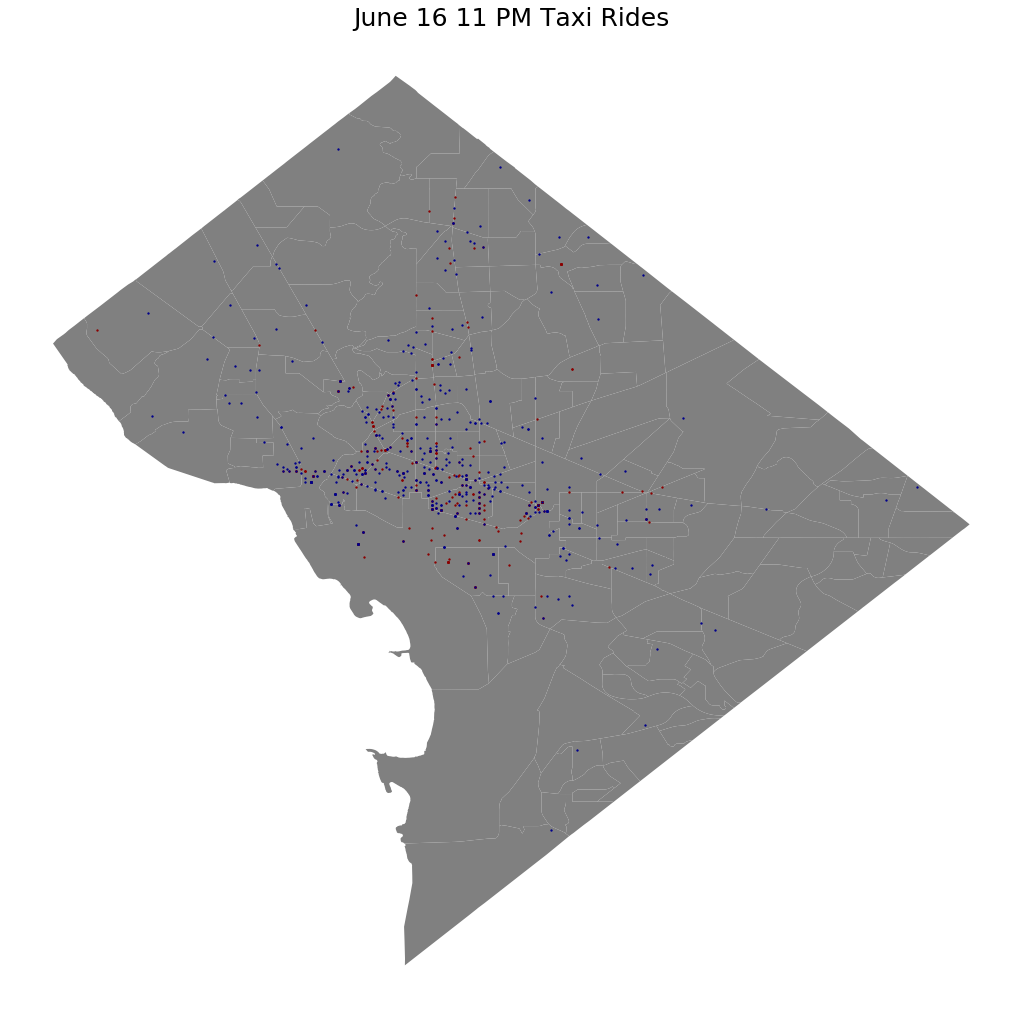

In [109]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(20,18))

#this is the map
# we want to set the ax values the same for both maps to see them overlayed
basemap = map_df.plot(ax=ax, color = 'grey')

#plot coordinates on top of map graph
geo_o16['2019-06-16 23:00:00'].plot(ax=basemap, color='darkred', marker = '.', markersize=7)
geo_d16['2019-06-16 23:00:00'].plot(ax=basemap, color='darkblue', marker = '.', markersize=7)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("June 16 11 PM Taxi Rides", fontsize=25, fontweight=3)

In [112]:
import imageio 
import os

In [120]:
png_dir='C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data'
images=[]

for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

imageio.mimsave('movie2.gif', images, duration=1)


In [119]:
print(images)

[Array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[25

In [117]:
png_dir='C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data'
os.listdir(png_dir)

['census-tracts-2010.geojson.txt',
 'June16_00.png',
 'June16_01.png',
 'June16_02.png',
 'June16_03.png',
 'June16_04.png',
 'June16_05.png',
 'June16_06.png',
 'June16_07.png',
 'June16_08.png',
 'June16_09.png',
 'June16_10.png',
 'June16_11.png',
 'June16_12.png',
 'June16_13.png',
 'June16_14.png',
 'June16_15.png',
 'June16_16.png',
 'June16_17.png',
 'June16_18.png',
 'June16_19.png',
 'June16_20.png',
 'June16_21.png',
 'June16_22.png',
 'June16_23.png',
 'taxi_2015.zip',
 'taxi_2016.zip',
 'taxi_2017.zip',
 'taxi_2018.zip',
 'taxi_2019.zip',
 'txt_files',
 'ward-2012.geojson.txt']

In [124]:
import imageio
import glob

image_path = r'C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data/*.png'
files = glob.glob(image_path)
images = []

for file in files:
    # imageio.imread(file) creates a numpy matrix array
    # In this case a 200 x 200 matrix for every file, since the files are 200 x 200 pixels.
    images.append(imageio.imread(file))
    print(file)
imageio.mimsave(r'C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data/movie3.gif', images, duration=2)

C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_00.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_01.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_02.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_03.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_04.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_05.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_06.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_07.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_08.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_09.png
C:/Users/GBTC408003ur/Documents/Data_Analytics_July2019/Final_Project_Data\June16_10.png
C:/Users/GBTC408003ur